In [89]:
## importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_auc_score, roc_curve, classification_report,
                             confusion_matrix, precision_score, recall_score, f1_score, accuracy_score)

RANDOM_STATE = 42

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv("/content/drive/MyDrive/customer_churn_dataset-training-master.csv")

In [57]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [59]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


**Missing Values**

In [60]:
missing_row = df[df.isnull().all(axis=1)]
missing_row


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df = df.dropna(how='all')
df.reset_index(drop=True, inplace=True)


In [62]:
df.isnull().sum()
df.shape

(440832, 12)

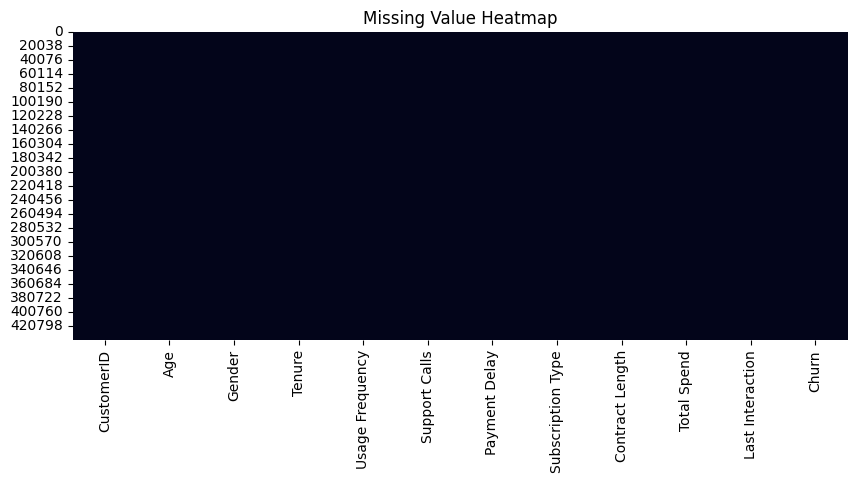

In [63]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

**Finding Duplicates**

In [64]:
 df.drop_duplicates(inplace= True)

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df[df.isnull() == True]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
440827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.columns.values

array(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype=object)

In [68]:
categorical_cols = [
    'Gender',
    'Subscription Type',
    'Contract Length'
]
numerical_cols = [
    'Age',
    'Tenure',
    'Usage Frequency',
    'Support Calls',
    'Payment Delay',
    'Total Spend',
    'Last Interaction'
]

**Outliers**

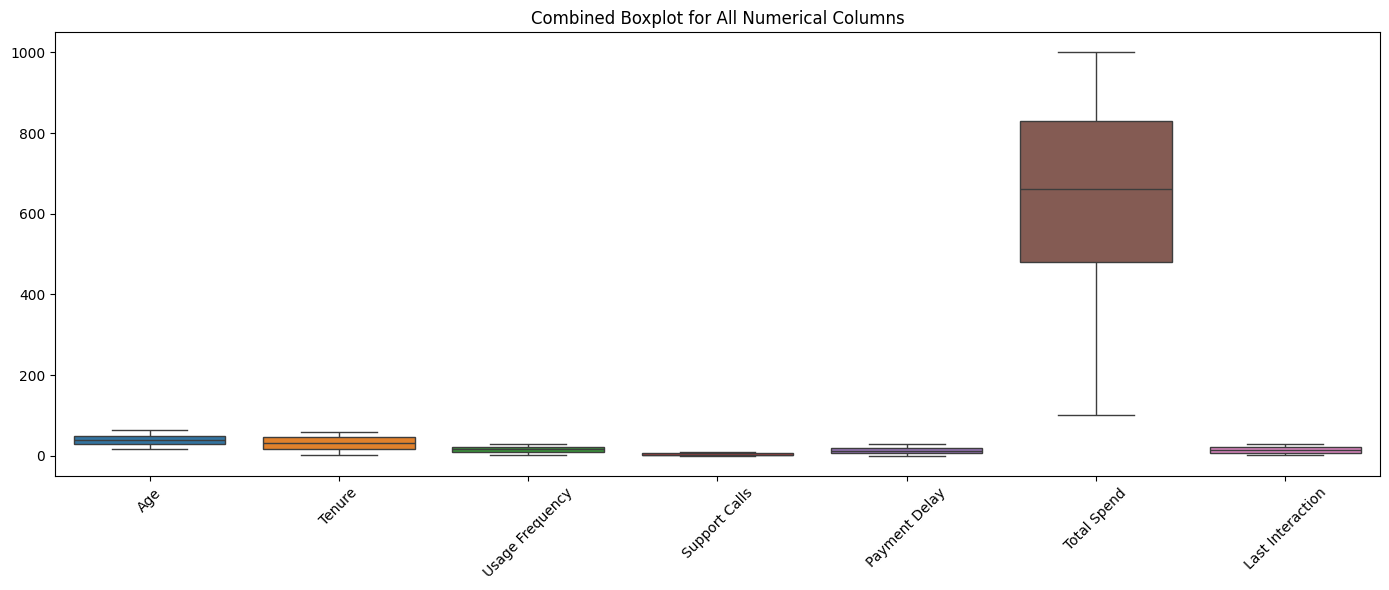

In [69]:

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Combined Boxplot for All Numerical Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
df.shape

(440832, 12)

In [71]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


Churn
1.0    249999
0.0    190833
Name: count, dtype: int64
Churn
1.0    0.567107
0.0    0.432893
Name: proportion, dtype: float64


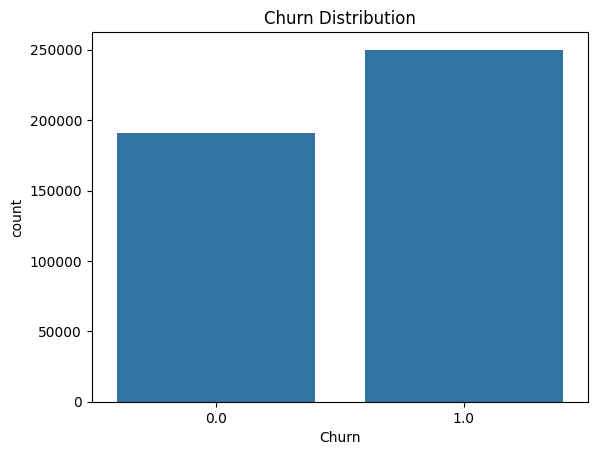

In [72]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()


**Analysis**

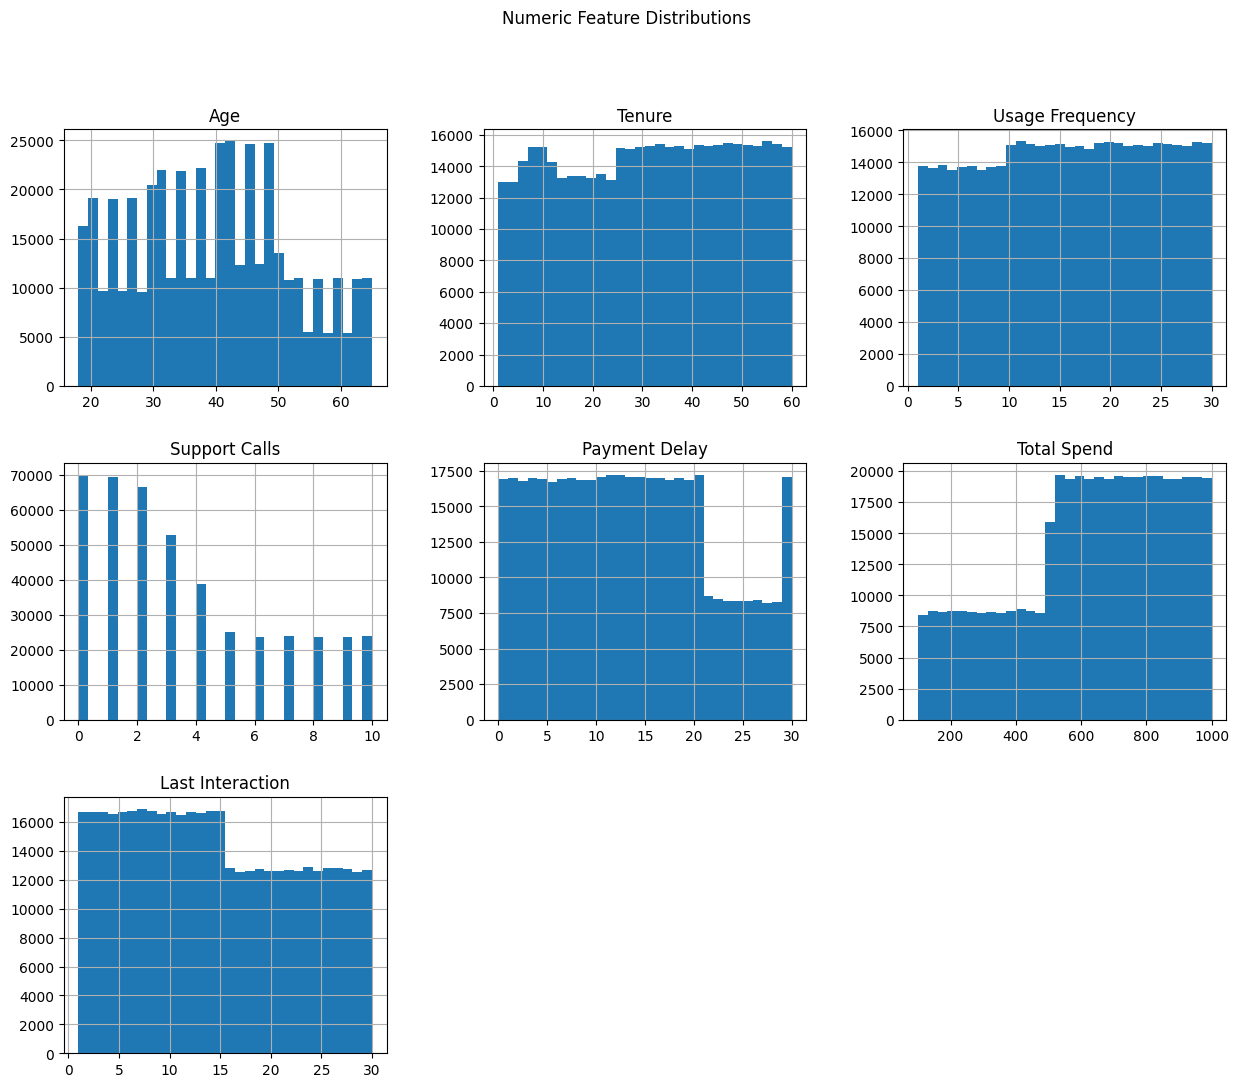

In [73]:
df[numerical_cols].hist(bins=30, figsize=(15,12))
plt.suptitle("Numeric Feature Distributions")
plt.show()


<Figure size 1200x500 with 0 Axes>

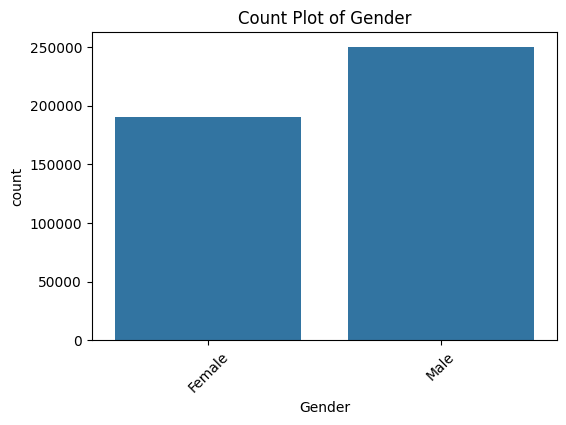

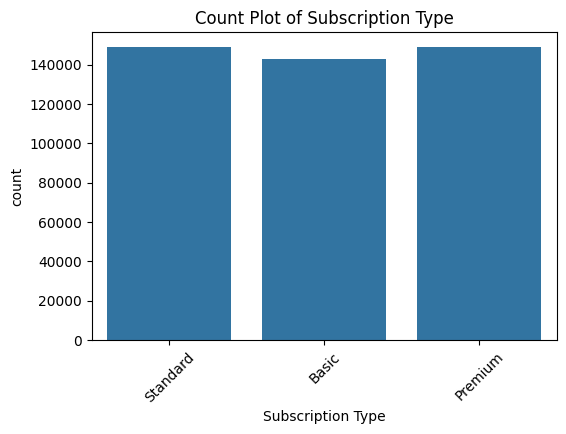

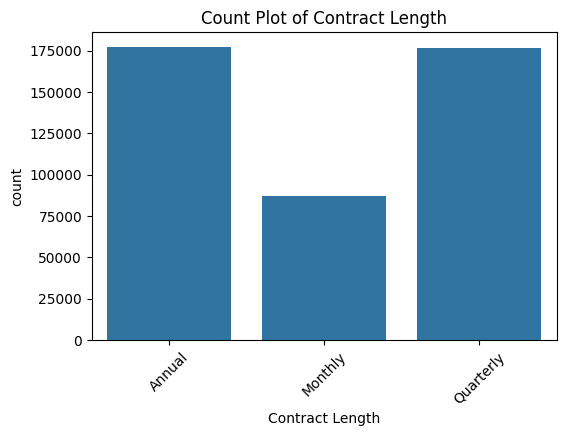

In [74]:
plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


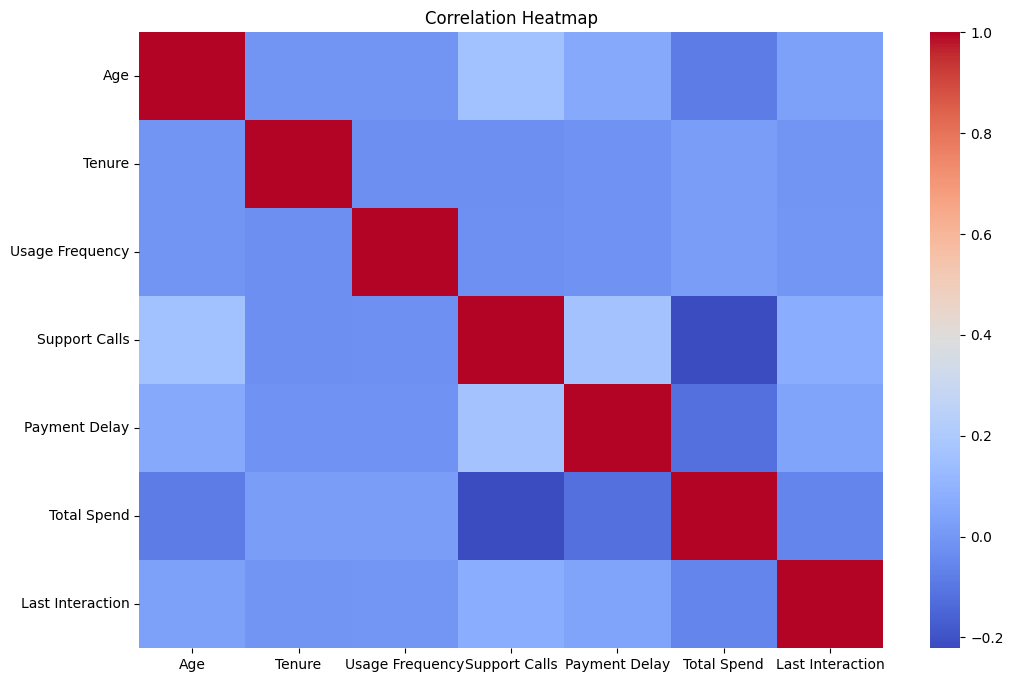

In [75]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

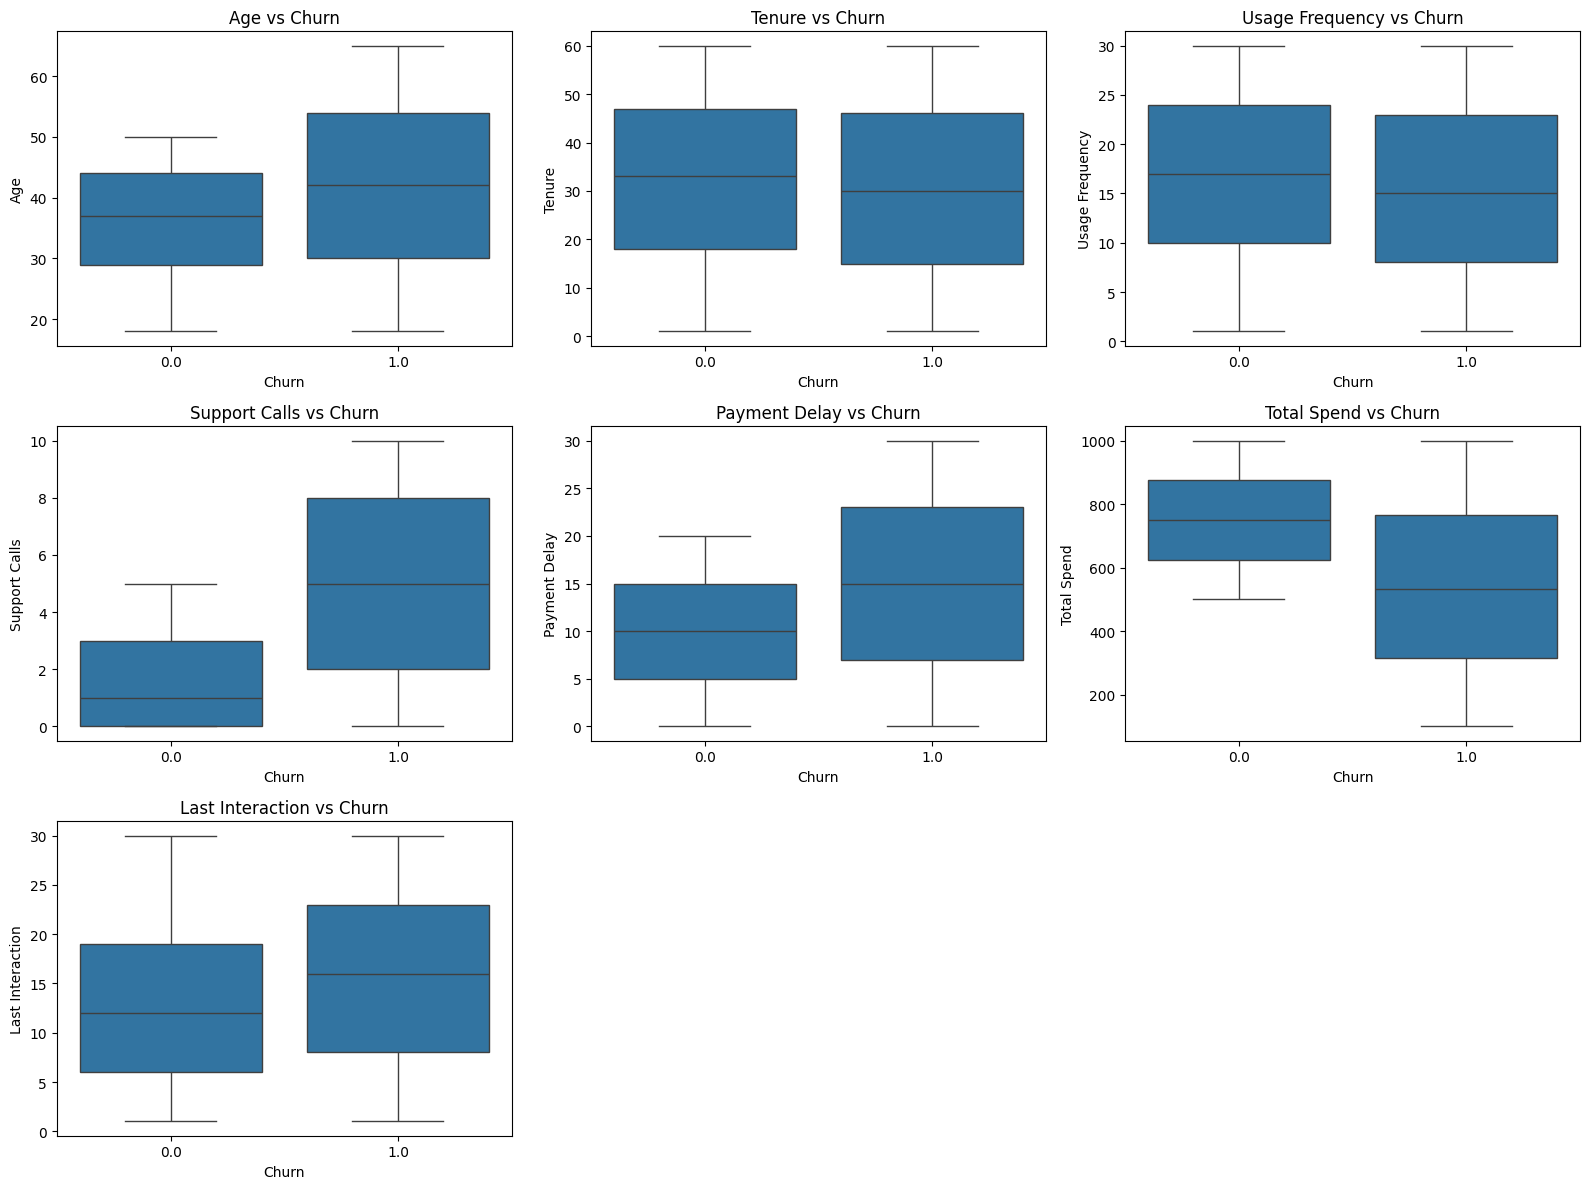

In [76]:
import math

num_cols = [col for col in numerical_cols if col != "Churn"]
n = len(num_cols)

rows = math.ceil(n / 3)

plt.figure(figsize=(16, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()

plt.show()



**Column Transformer**

In [77]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

transformer = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='drop', sparse_threshold=0)

In [78]:
transformer

ColumnTransformer(sparse_threshold=0,
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'Tenure', 'Usage Frequency',
                                  'Support Calls', 'Payment Delay',
                                  'Total Spend', 'Last Interaction']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Gender', 'Subscription Type',
                                  'Contract Length'])])

In [79]:
X = df.drop(columns=['CustomerID', 'Churn'])  # Drop ID and target
y = df['Churn']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=23)

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Create model with reasonable defaults
rf = RandomForestClassifier(
    n_estimators=200,       # slightly higher for stability
    random_state=42,
    n_jobs=-1
)




In [100]:
# Add model into your pipeline
pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('model', rf)
])


In [101]:
# Fit directly — NO TUNING
pipeline.fit(X_train, y_train)



Pipeline(steps=[('transformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'Subscription Type',
                                                   'Contract Length'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [102]:
# Evaluate
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print("Train Accuracy:", pipeline.score(X_train, y_train))
print("Test Accuracy:", pipeline.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9990654036004646


In [103]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]


In [104]:
confusion_matrix(y_test, y_pred)

array([[47501,     2],
       [  101, 62604]])

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47503
         1.0       1.00      1.00      1.00     62705

    accuracy                           1.00    110208
   macro avg       1.00      1.00      1.00    110208
weighted avg       1.00      1.00      1.00    110208



In [111]:
    print("\nTest set metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print("\nClassification report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Test set metrics:
Accuracy: 0.9990654036004646
Precision: 0.9999680541801105
Recall: 0.9983892831512639
F1: 0.9991780450239803
ROC-AUC: 0.9999993317499931

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47503
         1.0       1.00      1.00      1.00     62705

    accuracy                           1.00    110208
   macro avg       1.00      1.00      1.00    110208
weighted avg       1.00      1.00      1.00    110208

Confusion matrix:
 [[47501     2]
 [  101 62604]]


In [112]:
### picking the final_pl2 object

import pickle

with open("Customer_Classify.pkl","wb") as f:
    pickle.dump(pipeline,f)

In [113]:
with open("Customer_Classify.pkl","rb") as f:
    model = pickle.load(f)

In [114]:
import pandas as pd

input_data = pd.DataFrame([{
    'Age': 30.0,
    'Gender': 'Female',
    'Tenure': 39.0,
    'Usage Frequency': 14.0,
    'Support Calls': 5.0,
    'Payment Delay': 18.0,
    'Subscription Type': 'Standard',
    'Contract Length': 'Annual',
    'Total Spend': 932.0,
    'Last Interaction': 17.0
}])

model.predict(input_data)


array([1.])